In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.drop('id',axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')

0    90.25
1     9.75
Name: hypertension, dtype: float64
0    94.6
1     5.4
Name: heart_disease, dtype: float64
Yes    65.62
No     34.38
Name: ever_married, dtype: float64


<Figure size 1080x576 with 0 Axes>

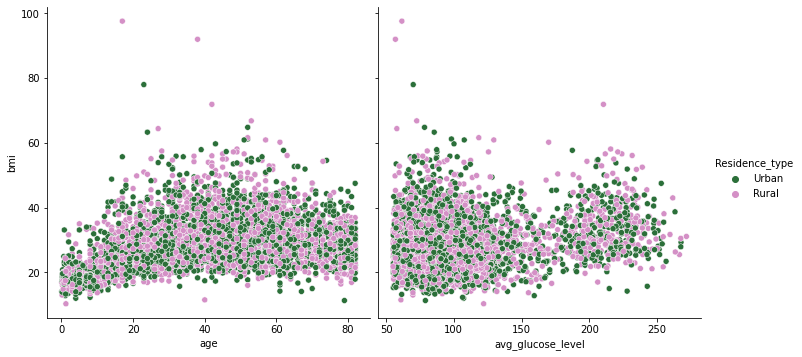

In [6]:
plt.figure(figsize = (15,8))
sns.pairplot(data=df, y_vars='bmi', x_vars=['age', 'avg_glucose_level'], hue='Residence_type',height=5,palette = 'cubehelix')

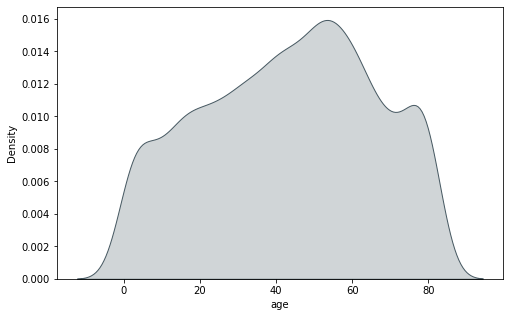

In [7]:
plt.figure(figsize = (8,5))
ax = sns.kdeplot(data=df, x='age', palette='cubehelix', color='#475962', fill=True)

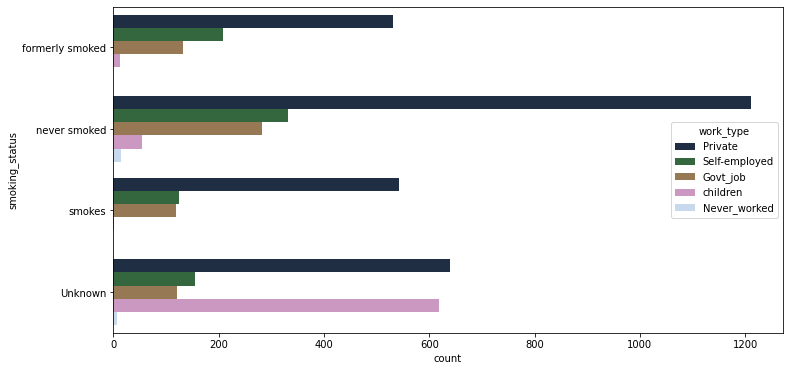

In [8]:
plt.figure(figsize = (12,6))
ax = sns.countplot(data=df, hue='work_type', y='smoking_status', palette='cubehelix', orient='h')

In [9]:
lab = LabelEncoder()
gender = lab.fit_transform(df['gender'])
smoking_status = lab.fit_transform(df['smoking_status'])
work_type = lab.fit_transform(df['work_type'])
Residence_type = lab.fit_transform(df['Residence_type'])
ever_married = lab.fit_transform(df['ever_married'])

df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [10]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [12]:
df['age']=df['age'].astype('int')

In [13]:
#Splitting the dataset
X = df.drop('stroke',axis=1)
y = df["stroke"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=100)

## Creating a XGB Classifier

In [14]:
#XGB Classifier
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
print('ACCURACY OF THE MODEL: {}'.format(xgb_model.score(X_test, y_test)))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


ACCURACY OF THE MODEL: 0.9478487614080835


## Trying the Random Forest Classifier

In [15]:
#Random Forest classifier
rf = RandomForestClassifier(n_estimators = 200) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.9517601043024772
